In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
#scipy is an open source Python library that contains tools to do hierarchical clustering 
#and building dendrograms. Only import the needed tool
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline

In [5]:
data = pd.read_csv("./data/Median values.csv")
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
0,Control Fish water,3.317,0.487,0.186,0.029
1,Control \n1% DMSO,3.394,0.451,0.182,0.034
2,C1,3.115,0.436,0.187,0.034
3,C2,0.000,0.000,0.000,0.000
4,C3,3.327,0.419,0.198,0.031
...,...,...,...,...,...
156,C155,0.000,0.000,0.000,0.000
157,C156,3.374,0.444,0.209,0.035
158,C157,3.375,0.392,0.180,0.029
159,C158,3.516,0.381,0.164,0.034


In [6]:
#Median YOLKSAC BREADTH Ratio = Median YOLKSAC BREADTH (mm)/Median length- mm
#Median Yolk sac area Ratio = Median Yolk sac area (mm)/Median length- mm
#Median Eye area Ratio = Median Eye area (mm)/Median length- mm
data["Median YOLKSAC BREADTH Ratio"] = data[["Median length- mm", "Median YOLKSAC BREADTH (mm)"]].apply(lambda x:x["Median YOLKSAC BREADTH (mm)"]/x["Median length- mm"],axis=1)
data["Median Yolk sac area Ratio"] = data[["Median length- mm", "Median Yolk sac area(mm2)"]].apply(lambda x:x["Median Yolk sac area(mm2)"]/x["Median length- mm"],axis=1)
data["Median Eye area Ratio"] = data[["Median length- mm", "Median Eye area(mm2)"]].apply(lambda x:x["Median Eye area(mm2)"]/x["Median length- mm"],axis=1)
# data.to_csv("./data/original data with ratio.csv")
data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C2,0.000,0.000,0.000,0.000,NaN,NaN,NaN
4,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
...,...,...,...,...,...,...,...,...
156,C155,0.000,0.000,0.000,0.000,NaN,NaN,NaN
157,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
158,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
159,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [7]:
#fill all Nan value with zero
data =  data.fillna(0)
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C2,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
4,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
...,...,...,...,...,...,...,...,...
156,C155,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
157,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
158,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
159,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [8]:
data_original_all = data[["Median length- mm", "Median YOLKSAC BREADTH (mm)", "Median Yolk sac area(mm2)", "Median Eye area(mm2)", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]]
data_original_all

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
4,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
...,...,...,...,...,...,...,...
156,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
157,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
158,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
159,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


## Using the dendrogram to find the optimal numbers of clusters. 

## 1.1 without PCA 

In hierarchical clustering, this new step also consists of finding the optimal number of clusters. Only this time we’re not going to use the elbow method. We are going to use the dendrogram.



Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. Below is the dendrogram diagram.

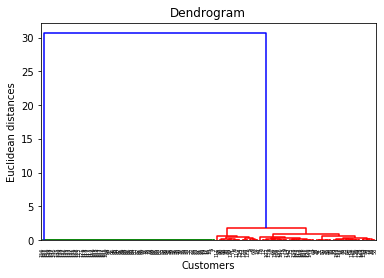

In [9]:
#Lets create a dendrogram variable linkage is actually the algorithm 
#itself of hierarchical clustering and then in linkage we have to 
#specify on which data we apply and engage. This is X dataset
dendrogra_all = sch.dendrogram(sch.linkage(data_original_all, method  = "ward"))
#plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

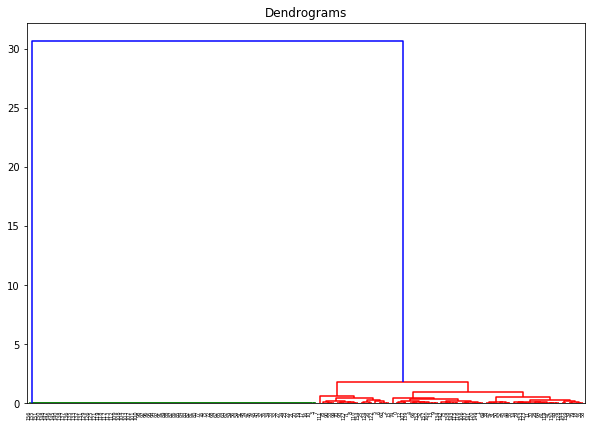

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_original_all, method='ward'))

So we still remove the 0 values

In [11]:
data1 = pd.read_csv("./data/original data with ratio.csv")
data1 = data1.drop(columns=["Unnamed: 0"], axis=1)
data1

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [12]:
data1 = data1.set_index("Compound")


In [13]:
data1.to_csv("./data/ratio_all_data.csv")

In [14]:
data1

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
Compound,,,,,,,
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593


In [15]:
#del df.index.name


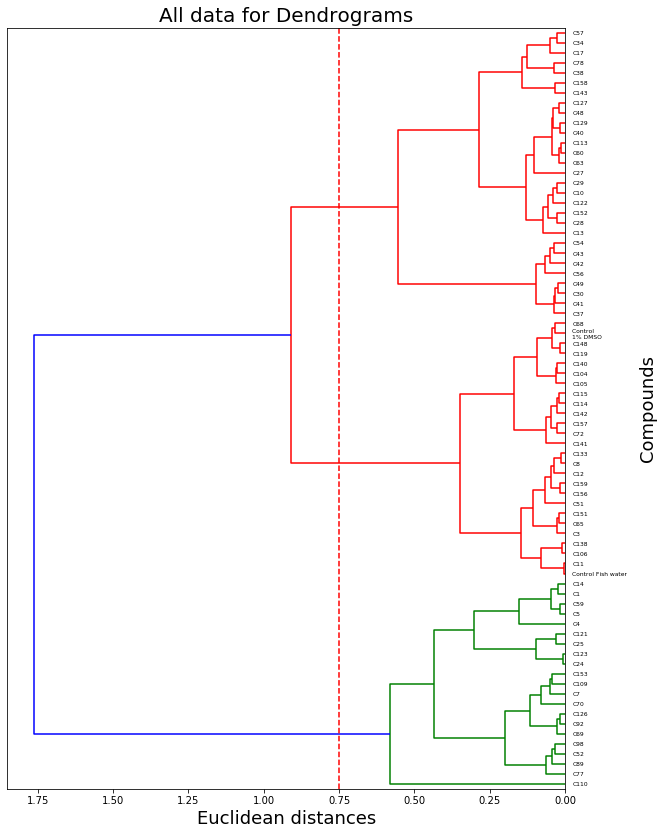

In [16]:
plt.figure(figsize=(10, 14))  
plt.title("All data for Dendrograms", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(data1, 'ward')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=data1.index)
plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_with_allvalues.png", dpi=300)

The y-axis consists of the compounds and y-axis consists of the Euclidean distance between the clusters. How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can horizontalwithout crossing any vertically line and this one is the red framed line on the above diagram. Let's count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

In [17]:
#Let’s now apply hierarchical clustering for 3 clusters:

In [18]:
ratio_data = data1[["Median length- mm", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]]
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
Compound,,,,
Control Fish water,3.317,0.146819,0.056075,0.008743
Control \n1% DMSO,3.394,0.132882,0.053624,0.010018
C1,3.115,0.139968,0.060032,0.010915
C3,3.327,0.125939,0.059513,0.009318
C4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
C153,3.237,0.157862,0.074761,0.009886
C156,3.374,0.131595,0.061944,0.010373
C157,3.375,0.116148,0.053333,0.008593


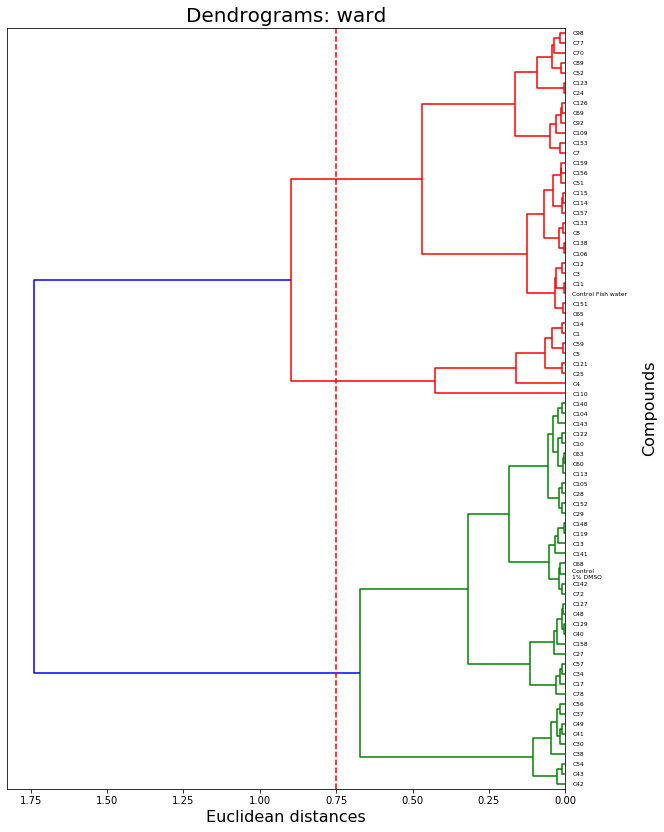

In [19]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms: ward", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=16)
plt.ylabel('Compounds', fontsize=16, labelpad=-650)
dend_ratio = sch.dendrogram(sch.linkage(ratio_data, method='ward'), orientation="left", labels = ratio_data.index)
plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_ward.png", dpi=300)



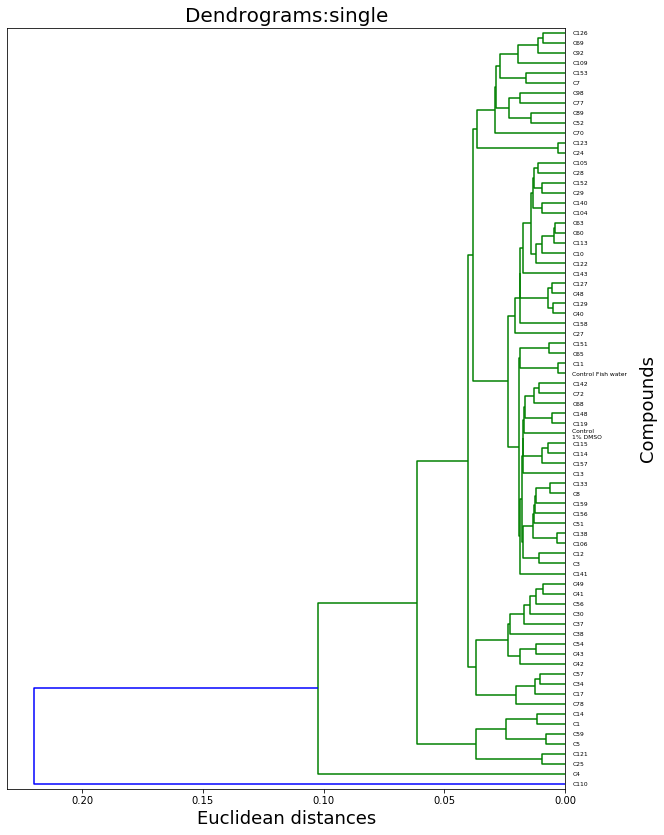

In [20]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms:single", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(ratio_data, 'single')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=ratio_data.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_single.png", dpi=300)

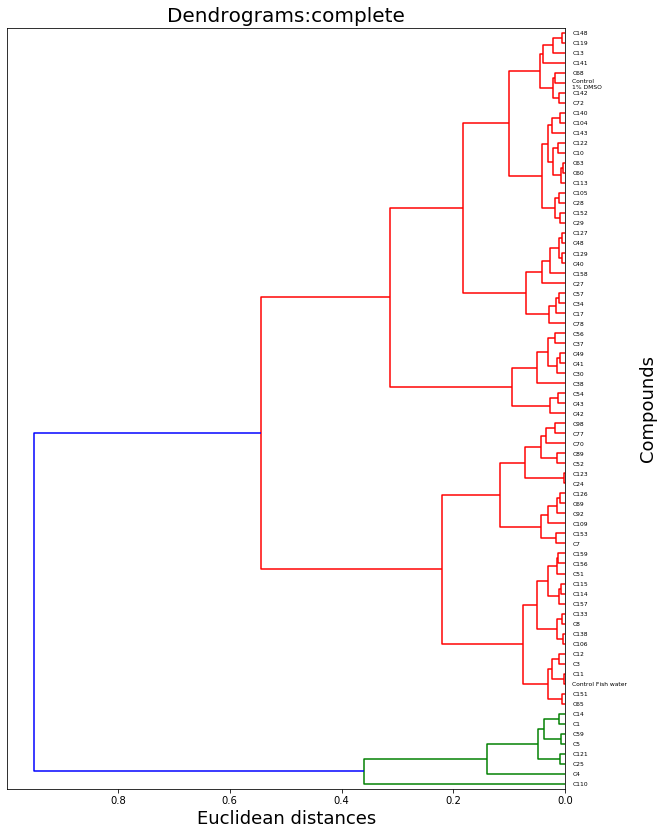

In [21]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms:complete", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(ratio_data, 'complete')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=ratio_data.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_complete.png", dpi=300)

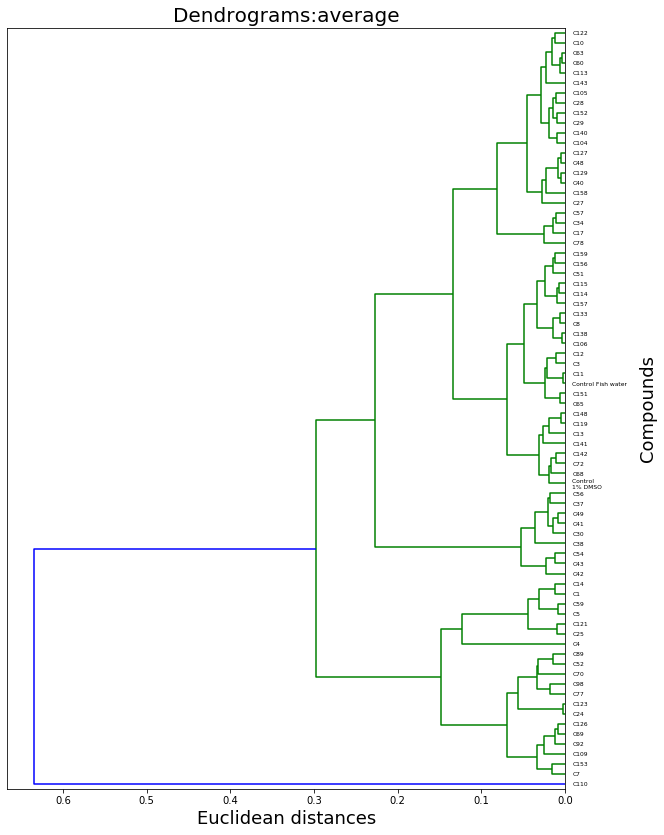

In [22]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms:average", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(ratio_data, 'average')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=ratio_data.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_average.png", dpi=300)

============================================================================================

============================================================================================

# Hierarchical Clustering  

### Ward

Here we use only "Median length- mm", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio" to do Hierarchical Clustering. 
#inoder to compare to KMEANS we use 3, 6 clusters

Fitting hierarchical clustering to the dataset. There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class

**3 Clusters**

In [23]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward').fit(ratio_data)

In [24]:
data1["3 clusters"] = hc3.labels_
data1

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters
Compound,,,,,,,,
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,1
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,0
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,2
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,1
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,2
...,...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,1
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,1
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,1


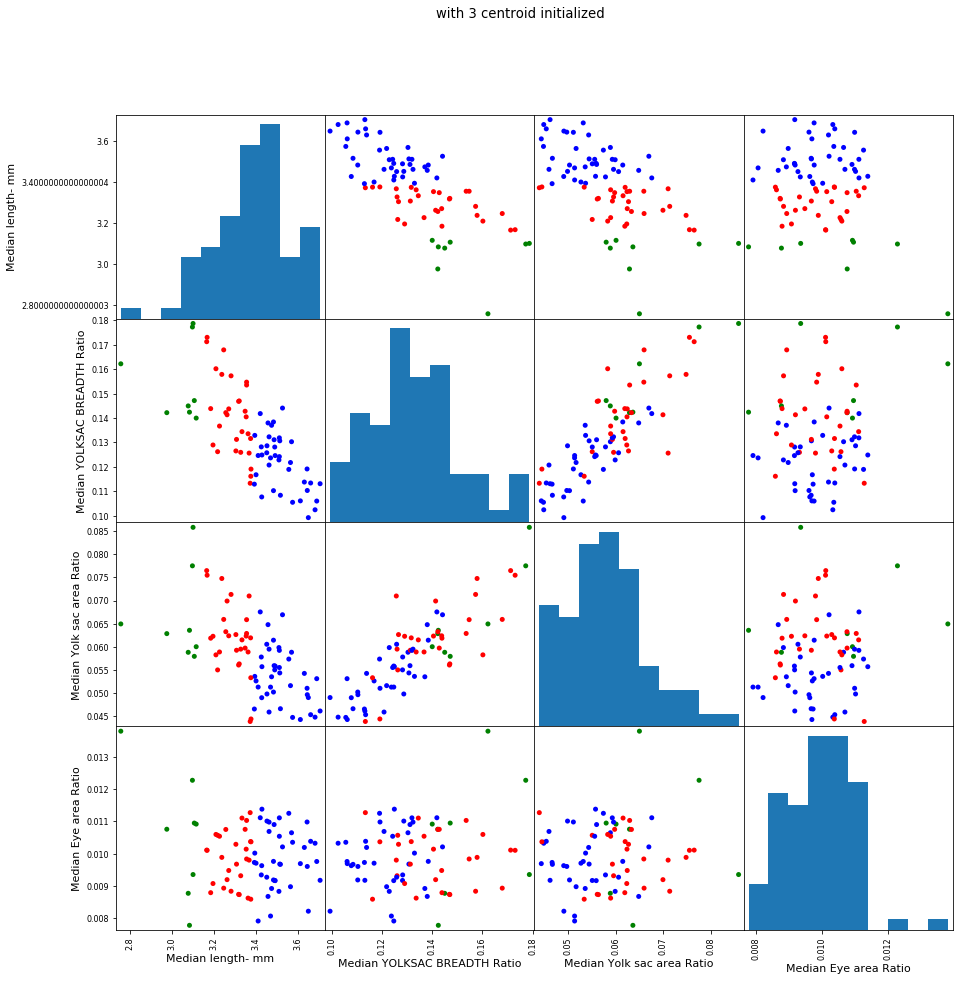

In [25]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'red', "green"])
scatter_matrix(data1[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data1["3 clusters"]], figsize=(15,15))
plt.suptitle("with 3 centroid initialized")
plt.savefig("./picture/hc/3 clusters.png", dpi=300)

In [28]:
data1.to_csv("./data/hc_3clusters_no_sort_values.csv")

In [27]:
data1.sort_values("3 clusters").to_csv("./data/hc_3clusters.csv")
data1.sort_values("3 clusters")

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters
Compound,,,,,,,,
C41,3.643,0.434,0.186,0.040,0.119133,0.051057,0.010980,0
C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,0
C42,3.705,0.419,0.171,0.034,0.113090,0.046154,0.009177,0
C43,3.681,0.377,0.165,0.038,0.102418,0.044825,0.010323,0
C48,3.513,0.459,0.191,0.034,0.130658,0.054369,0.009678,0
...,...,...,...,...,...,...,...,...
C14,3.106,0.457,0.180,0.034,0.147135,0.057952,0.010947,2
C59,3.077,0.446,0.181,0.027,0.144946,0.058824,0.008775,2
C121,3.097,0.549,0.240,0.038,0.177268,0.077494,0.012270,2


In [62]:
# Lets try to fit the hierarchical clustering algorithm  to dataset 
# while creating the clusters vector that tells for each compound
#which cluster the compound belongs to.
#hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [64]:
#y_hc2=hc2.fit_predict(ratio_data)
#the function of hc2 and y_hc2 is same as
#hc_2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward').fit(data_only_ratio)
#y_hc2 = hc_2.labels_

In [79]:
# data1["2 clusters"] = y_hc2
# data1

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,2 clusters
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,1
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0
...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,1


**6 Clusters**

In [30]:
hc6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward').fit(ratio_data)

In [31]:
data1["6 clusters"] = hc6.labels_
data1

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters
Compound,,,,,,,,,
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,1,4
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,0,0
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,2,1
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,1,4
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,2,1
...,...,...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,1,2
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,1,4
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,1,4


In [34]:
data1.to_csv("./data/hc_6clusters_no_sort_values.csv.csv")
data1.sort_values("6 clusters").to_csv("./data/hc_6clusters.csv")
data1.sort_values("6 clusters")

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters
Compound,,,,,,,,,
C140,3.469,0.429,0.178,0.028,0.123667,0.051312,0.008071,0,0
C40,3.509,0.431,0.210,0.031,0.122827,0.059846,0.008834,0,0
C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,0,0
C141,3.427,0.369,0.168,0.033,0.107674,0.049022,0.009629,0,0
C142,3.392,0.383,0.158,0.033,0.112913,0.046580,0.009729,0,0
...,...,...,...,...,...,...,...,...,...
C8,3.353,0.471,0.209,0.034,0.140471,0.062332,0.010140,1,4
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,1,4
C138,3.355,0.515,0.211,0.037,0.153502,0.062891,0.011028,1,4


In [32]:
# plt.rcParams['font.size'] = 11
# colors = np.array(['blue', 'red'])
# scatter_matrix(data1[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data1["2 clusters"]], figsize=(15,15))
# plt.suptitle("with 2 centroid initialized")
# plt.savefig("./picture/hc/2 clusters.png", dpi=300)

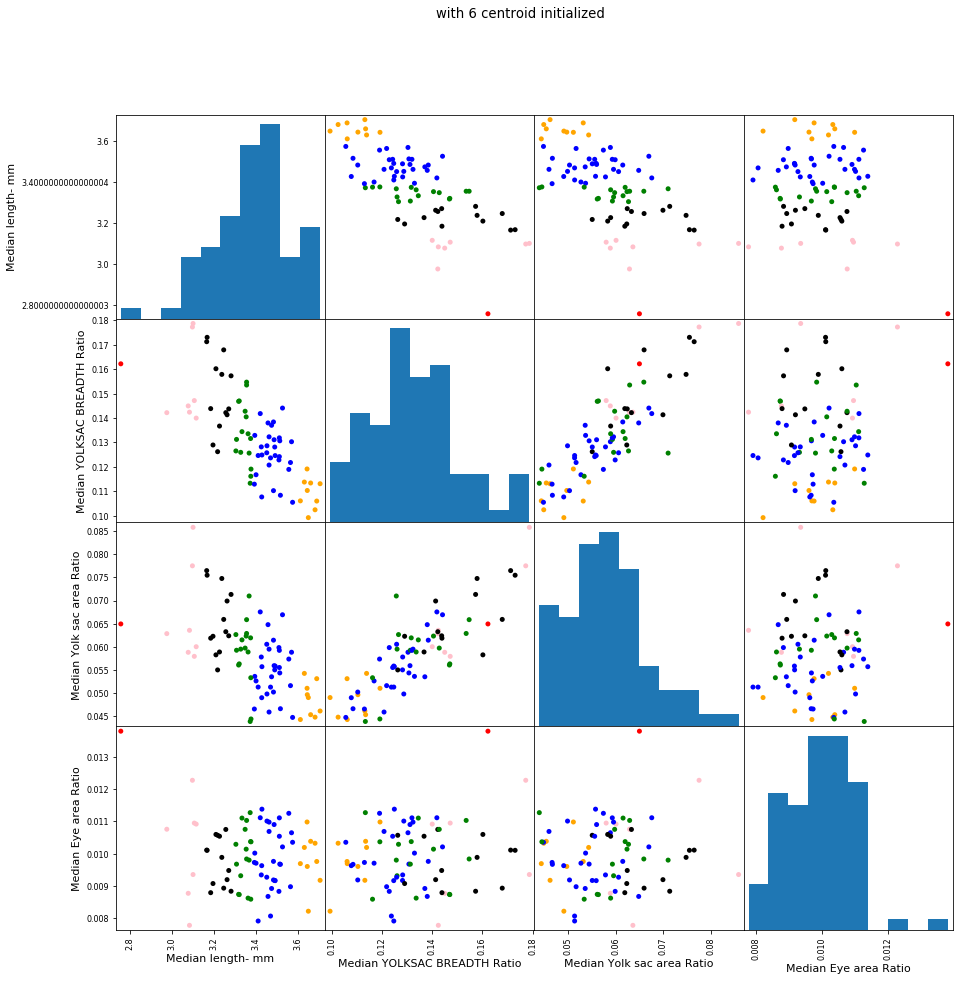

In [33]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'pink', 'black', 'orange', 'green', 'red'])
scatter_matrix(data1[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data1["6 clusters"]], figsize=(15,15))
plt.suptitle("with 6 centroid initialized")
plt.savefig("./picture/hc/6 clusters.png", dpi=300)

In [50]:
#Visualizing the clusters. This code is similar to k-means 
#visualization code. We only replace the y_kmeans vector name to 
#y_hc for the hierarchical clustering

### Complete

In [45]:
complete_3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete').fit(ratio_data)

In [46]:
data1["3 clusters_complete"] = complete_3.labels_
data1

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters,3 clusters_complete,4 clusters_average
Compound,,,,,,,,,,,
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,1,4,2,2
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,0,0,1,2
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,2,1,0,0
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,1,4,2,2
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,1,2,2,0
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,1,4,2,2
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,1,4,2,2


In [47]:
data1.to_csv("./data/hc_complete_3clusters_no_sort_values.csv")
data1.sort_values("3 clusters_complete").to_csv("./data/hc_3clusters_complete.csv")
data1.sort_values("3 clusters_complete")

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters,3 clusters_complete,4 clusters_average
Compound,,,,,,,,,,,
C121,3.097,0.549,0.240,0.038,0.177268,0.077494,0.012270,2,1,0,0
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,2,1,0,0
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,2,1,0,0
C5,3.083,0.439,0.196,0.024,0.142394,0.063574,0.007785,2,1,0,0
C110,2.756,0.447,0.179,0.038,0.162192,0.064949,0.013788,2,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...
C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,1,2,2,0
C106,3.355,0.519,0.221,0.033,0.154694,0.065872,0.009836,1,4,2,2
C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,1,2,2,0


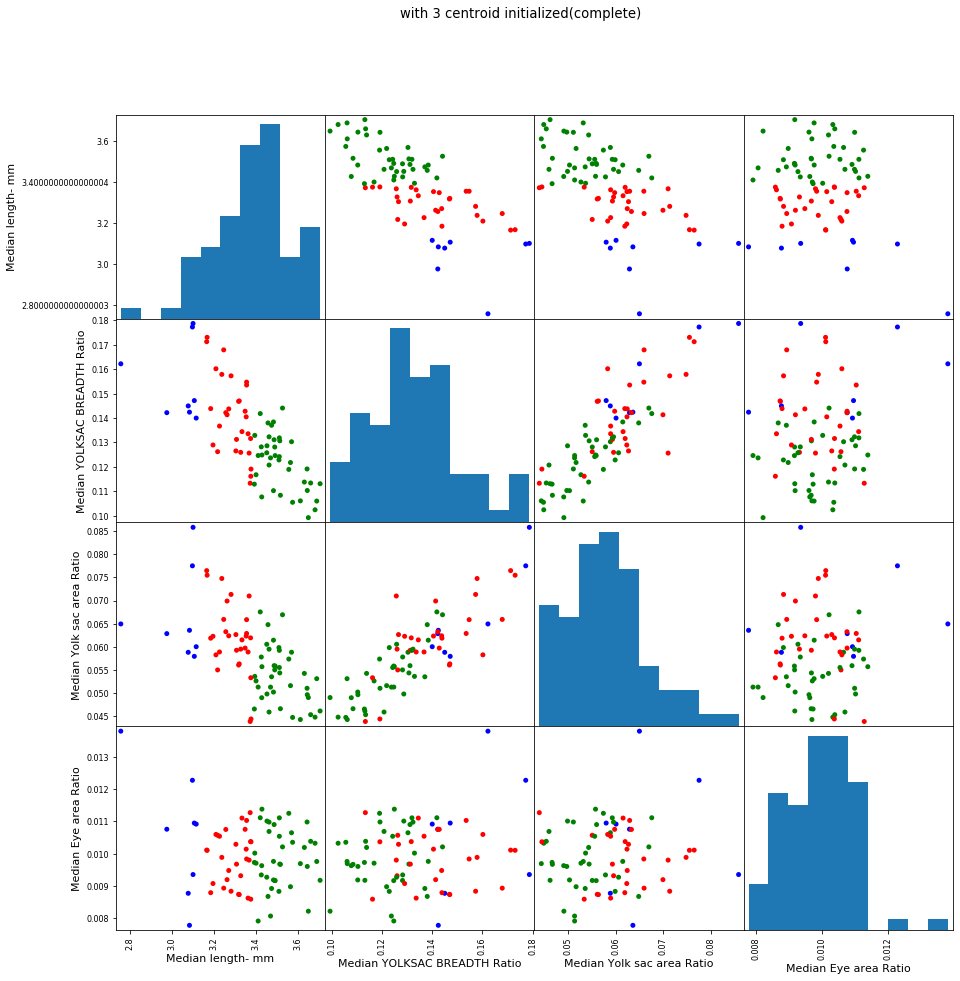

In [48]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'green', 'red'])
scatter_matrix(data1[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data1["3 clusters_complete"]], figsize=(15,15))
plt.suptitle("with 3 centroid initialized(complete)")
plt.savefig("./picture/hc/3 clusters_complete.png", dpi=300)

### Average 

In [49]:
average_4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average').fit(ratio_data)

In [51]:
data1["4 clusters_average"] = average_4.labels_
data1

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters,3 clusters_complete,4 clusters_average
Compound,,,,,,,,,,,
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,1,4,2,2
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,0,0,1,2
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,2,1,0,0
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,1,4,2,2
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,1,2,2,0
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,1,4,2,2
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,1,4,2,2


In [52]:
data1.to_csv("./data/hc_average_4clusters_no_sort_values.csv")
data1.sort_values("4 clusters_average").to_csv("./data/hc_4clusters_average.csv")
data1.sort_values("4 clusters_average")

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,3 clusters,6 clusters,3 clusters_complete,4 clusters_average
Compound,,,,,,,,,,,
C69,3.262,0.461,0.228,0.030,0.141324,0.069896,0.009197,1,2,2,0
C52,3.217,0.406,0.177,0.034,0.126205,0.055020,0.010569,1,2,2,0
C126,3.256,0.463,0.206,0.035,0.142199,0.063268,0.010749,1,2,2,0
C59,3.077,0.446,0.181,0.027,0.144946,0.058824,0.008775,2,1,0,0
C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
C72,3.400,0.397,0.179,0.033,0.116765,0.052647,0.009706,0,0,1,2
C78,3.574,0.377,0.160,0.037,0.105484,0.044768,0.010353,0,0,1,2
C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,0,0,1,2


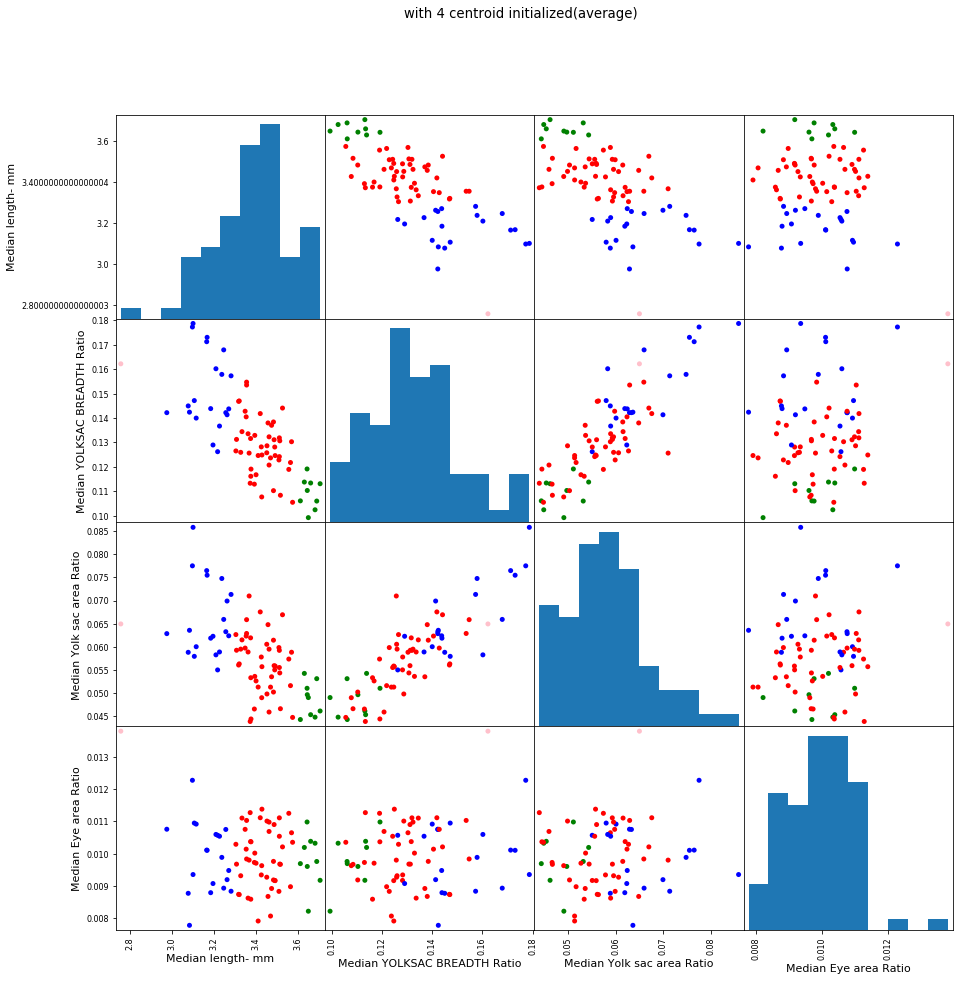

In [53]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'green', 'red', 'pink'])
scatter_matrix(data1[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data1["4 clusters_average"]], figsize=(15,15))
plt.suptitle("with 4 centroid initialized(average)")
plt.savefig("./picture/hc/4 clusters_average.png", dpi=300)

# with PCA

In [54]:
from sklearn.decomposition import PCA

In [55]:
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
Compound,,,,
Control Fish water,3.317,0.146819,0.056075,0.008743
Control \n1% DMSO,3.394,0.132882,0.053624,0.010018
C1,3.115,0.139968,0.060032,0.010915
C3,3.327,0.125939,0.059513,0.009318
C4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
C153,3.237,0.157862,0.074761,0.009886
C156,3.374,0.131595,0.061944,0.010373
C157,3.375,0.116148,0.053333,0.008593


In [56]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ratio_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.065162,0.006905
1,-0.012689,-0.000661
2,0.266149,-0.013493
3,0.053763,-0.009715
4,0.405958,-0.021307
...,...,...
71,0.146264,0.018476
72,0.007395,0.000115
73,0.005015,-0.017393
74,-0.136309,-0.016160


In [57]:
data2 = pd.read_csv("./data/original data with ratio.csv")
data2 = data2.drop(columns=["Unnamed: 0"], axis=1)
data2

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [58]:
principalDf1 = pd.concat([data2, principalDf], axis=1)
principalDf1 

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,-0.012689,-0.000661
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0.053763,-0.009715
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307
...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0.007395,0.000115
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0.005015,-0.017393
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,-0.136309,-0.016160


In [59]:
principalDf2 = principalDf1[["Compound", "principal component 1", "principal component 1"]]
principalDf2

,Compound,principal component 1,principal component 1
0,Control Fish water,0.065162,0.065162
1,Control \n1% DMSO,-0.012689,-0.012689
2,C1,0.266149,0.266149
3,C3,0.053763,0.053763
4,C4,0.405958,0.405958
...,...,...,...
71,C153,0.146264,0.146264
72,C156,0.007395,0.007395
73,C157,0.005015,0.005015
74,C158,-0.136309,-0.136309


In [60]:
principalDf2 = principalDf2.set_index("Compound")


In [61]:
del principalDf2.index.name


In [62]:
principalDf2

,principal component 1,principal component 1
Control Fish water,0.065162,0.065162
Control \n1% DMSO,-0.012689,-0.012689
C1,0.266149,0.266149
C3,0.053763,0.053763
C4,0.405958,0.405958
...,...,...
C153,0.146264,0.146264
C156,0.007395,0.007395
C157,0.005015,0.005015
C158,-0.136309,-0.136309


**Dendrogram**

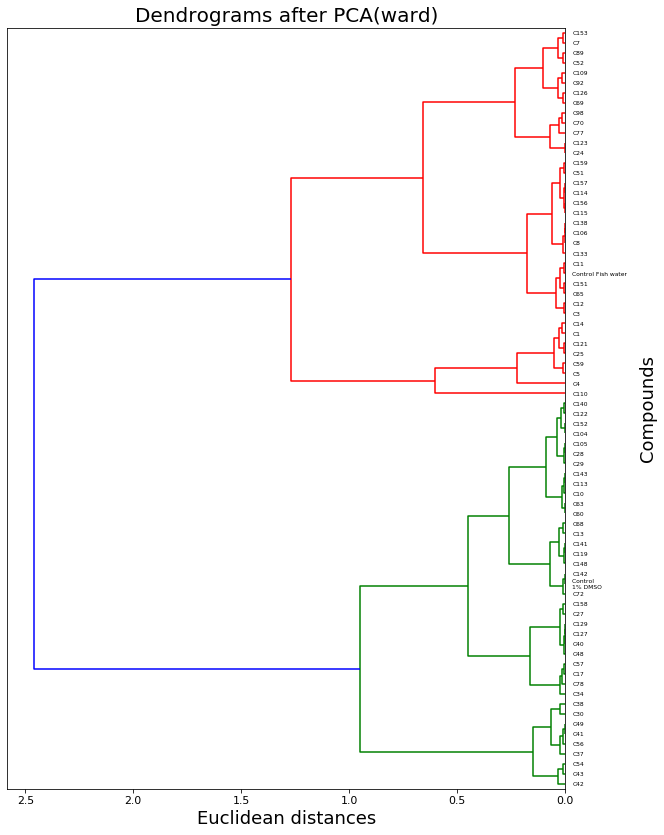

In [63]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms after PCA(ward)", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(principalDf2, 'ward')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=principalDf2.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_pca_ward.png", dpi=300)

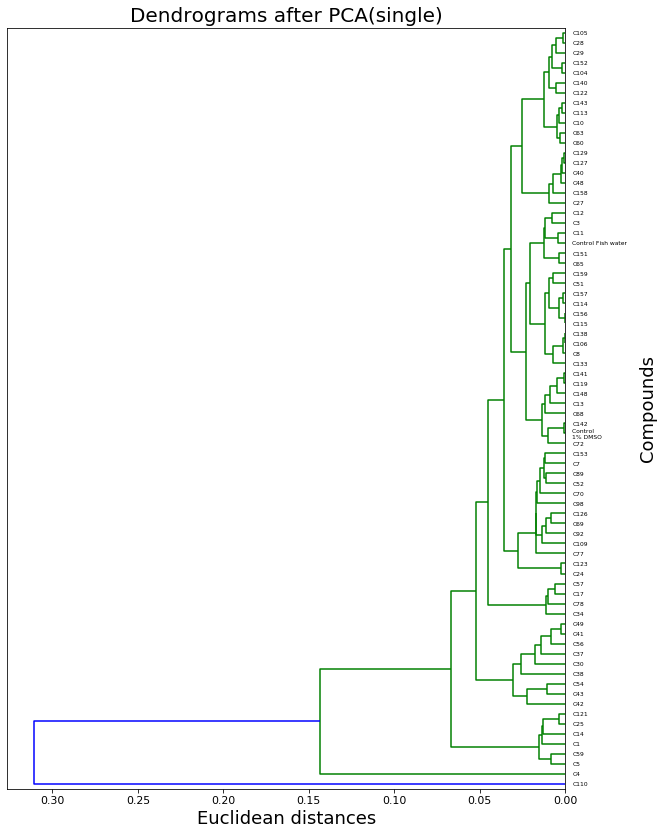

In [64]:
plt.figure(figsize=(10, 14))  
plt.title("Dendrograms after PCA(single)", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-650)
# Calculate the distance between each sample
Z = sch.linkage(principalDf2, 'single')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=principalDf2.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_pca_single.png", dpi=300)

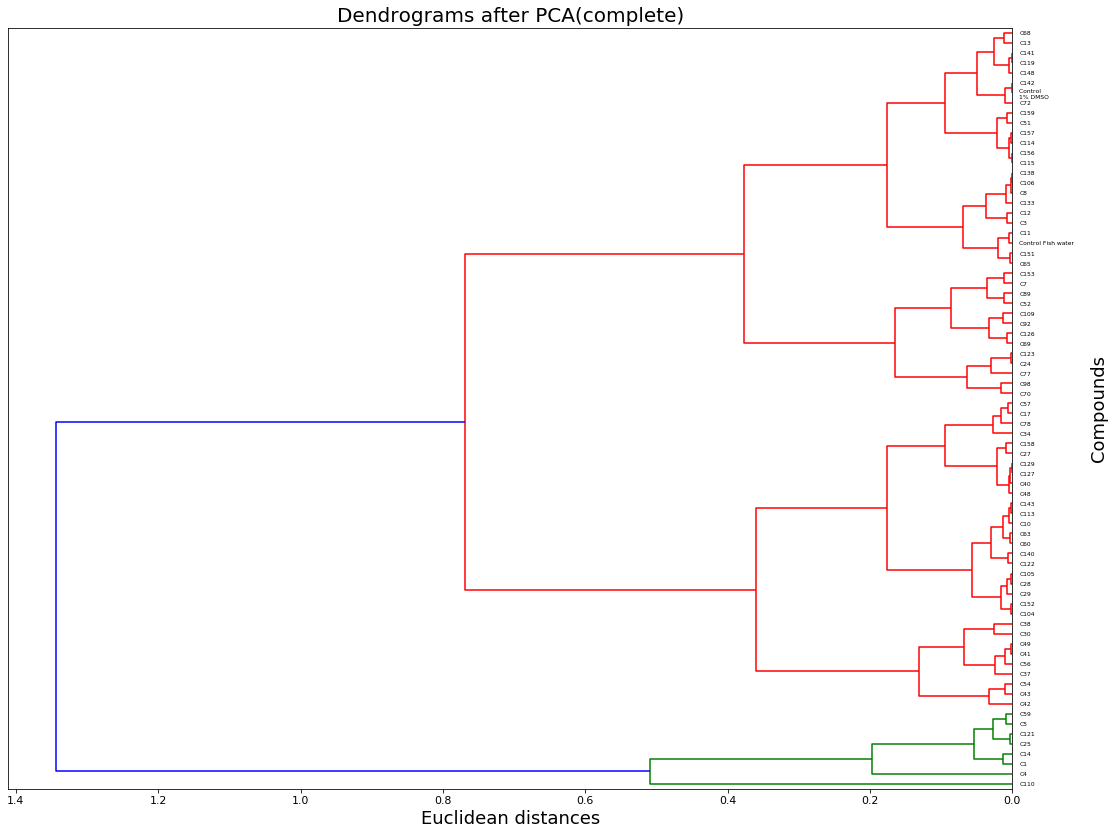

In [73]:
plt.figure(figsize=(18, 14))  
plt.title("Dendrograms after PCA(complete)", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-1100)
# Calculate the distance between each sample
Z = sch.linkage(principalDf2, 'complete')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=principalDf2.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_pca_complete.png", dpi=300)

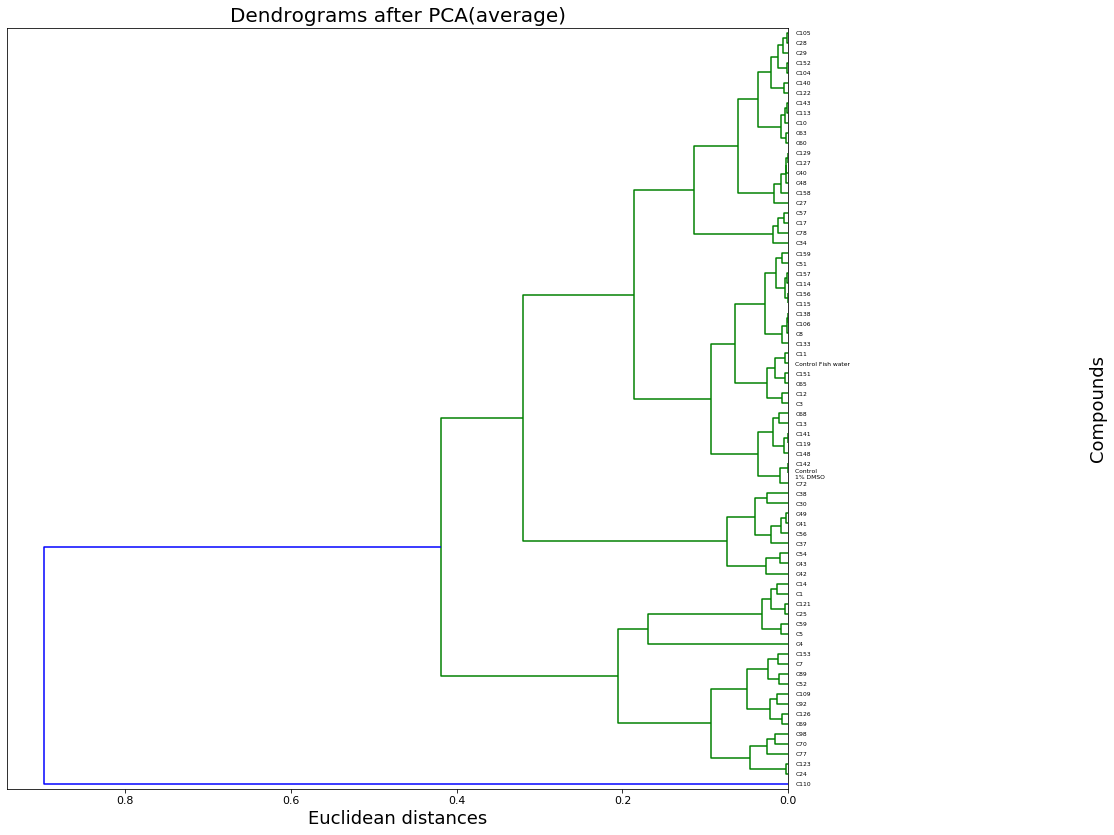

In [75]:
plt.figure(figsize=(14, 14))  
plt.title("Dendrograms after PCA(average)", fontsize=20)  
plt.xlabel('Euclidean distances', fontsize=18)
plt.ylabel('Compounds', fontsize=18, labelpad=-1100)
# Calculate the distance between each sample
Z = sch.linkage(principalDf2, 'average')
# Plot with Compound leaves and Orientation of the dendrogram
dend = sch.dendrogram(Z, orientation="left", labels=principalDf2.index)
#plt.axvline(x=0.75, color='r', linestyle='--')
plt.savefig("./picture/dendrogram_pca_average.png", dpi=300)

**PCA ward**

In [79]:
pca_hc3_ward = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward').fit(principalDf)

In [83]:
principalDf1["pca_3_clusters_ward"] = pca_hc3_ward.labels_
principalDf1 = principalDf1.drop(columns="pca_3_clusters", axis=1)

In [84]:
principalDf1.to_csv("./data/hc_pca_ward_3clusters_no_sort_values.csv")
principalDf1.sort_values("pca_3_clusters_ward").to_csv("./data/hc_pca_ward_3clusters_ward.csv")
principalDf1.sort_values("pca_3_clusters_ward")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_3_clusters_ward
24,C41,3.643,0.434,0.186,0.040,0.119133,0.051057,0.010980,-0.261996,0.005417,0
48,C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,-0.070930,-0.001551,0
25,C42,3.705,0.419,0.171,0.034,0.113090,0.046154,0.009177,-0.324390,0.002764,0
26,C43,3.681,0.377,0.165,0.038,0.102418,0.044825,0.010323,-0.301284,-0.009322,0
27,C48,3.513,0.459,0.191,0.034,0.130658,0.054369,0.009678,-0.131461,0.007001,0
...,...,...,...,...,...,...,...,...,...,...,...
12,C14,3.106,0.457,0.180,0.034,0.147135,0.057952,0.010947,0.275586,-0.008606,2
34,C59,3.077,0.446,0.181,0.027,0.144946,0.058824,0.008775,0.304359,-0.012497,2
56,C121,3.097,0.549,0.240,0.038,0.177268,0.077494,0.012270,0.287333,0.026151,2
5,C5,3.083,0.439,0.196,0.024,0.142394,0.063574,0.007785,0.298326,-0.012327,2


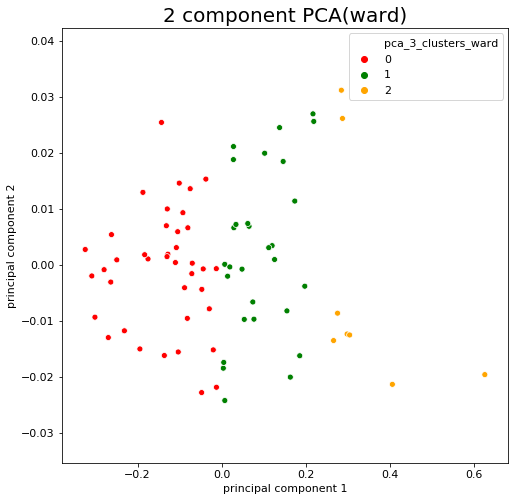

In [87]:
x_axis = principalDf1['principal component 1']
y_axis = principalDf1['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf1["pca_3_clusters_ward"], palette = ['red', 'green', 'orange'])
plt.title('2 component PCA(ward)', fontsize = 20)
plt.savefig("./picture/hc/pca_3_clusters_ward", dpi=300)
plt.show()

### PCA Complete

In [89]:
pca_hc3_complete = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete').fit(principalDf)

In [90]:
principalDf1["pca_3_clusters_complete"] = pca_hc3_complete.labels_
principalDf1

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_3_clusters_ward,pca_3_clusters_complete
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,1,2
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,-0.012689,-0.000661,0,1
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,2,0
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0.053763,-0.009715,1,2
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476,1,2
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0.007395,0.000115,1,2
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0.005015,-0.017393,1,2
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,-0.136309,-0.016160,0,1


In [91]:
principalDf1.to_csv("./data/hc_pca_complete_3clusters_no_sort_values.csv")
principalDf1.sort_values("pca_3_clusters_complete").to_csv("./data/hc_pca_3clusters_complete.csv")
principalDf1.sort_values("pca_3_clusters_complete")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_3_clusters_ward,pca_3_clusters_complete
56,C121,3.097,0.549,0.240,0.038,0.177268,0.077494,0.012270,0.287333,0.026151,2,0
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,2,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,2,0
5,C5,3.083,0.439,0.196,0.024,0.142394,0.063574,0.007785,0.298326,-0.012327,2,0
51,C110,2.756,0.447,0.179,0.038,0.162192,0.064949,0.013788,0.625807,-0.019571,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46,C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,0.185653,-0.016204,1,2
49,C106,3.355,0.519,0.221,0.033,0.154694,0.065872,0.009836,0.028142,0.021141,1,2
50,C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,0.102257,0.019946,1,2
39,C69,3.262,0.461,0.228,0.030,0.141324,0.069896,0.009197,0.119988,0.003451,1,2


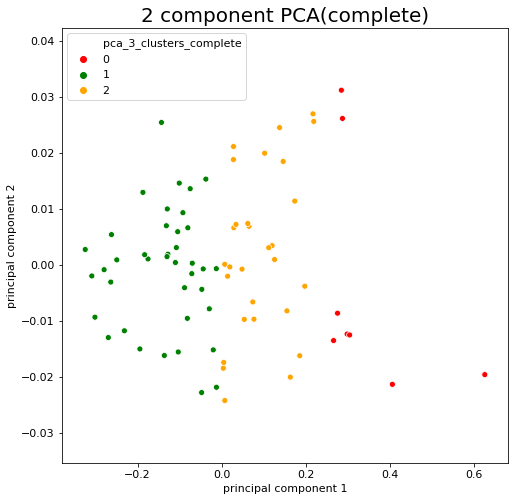

In [93]:
x_axis = principalDf1['principal component 1']
y_axis = principalDf1['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf1["pca_3_clusters_complete"], palette = ['red', 'green', 'orange'])
plt.title('2 component PCA(complete)', fontsize = 20)
plt.savefig("./picture/hc/pca_3_clusters_complete", dpi=300)
plt.show()

### PCA Average

**3 clusters**

In [95]:
pca_hc3_average = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average').fit(principalDf)

In [96]:
principalDf1["pca_3_clusters_average"] = pca_hc3_average.labels_
principalDf1

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_3_clusters_ward,pca_3_clusters_complete,pca_3_clusters_average
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,1,2,2
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,-0.012689,-0.000661,0,1,1
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,2,0,0
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0.053763,-0.009715,1,2,2
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476,1,2,2
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0.007395,0.000115,1,2,2
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0.005015,-0.017393,1,2,2
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,-0.136309,-0.016160,0,1,1


In [97]:
principalDf1.to_csv("./data/hc_pca_average_3clusters_no_sort_values.csv")
principalDf1.sort_values("pca_3_clusters_average").to_csv("./data/hc_pca_3clusters_average.csv")
principalDf1.sort_values("pca_3_clusters_average")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_3_clusters_ward,pca_3_clusters_complete,pca_3_clusters_average
56,C121,3.097,0.549,0.240,0.038,0.177268,0.077494,0.012270,0.287333,0.026151,2,0,0
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,2,0,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,2,0,0
5,C5,3.083,0.439,0.196,0.024,0.142394,0.063574,0.007785,0.298326,-0.012327,2,0,0
51,C110,2.756,0.447,0.179,0.038,0.162192,0.064949,0.013788,0.625807,-0.019571,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,0.185653,-0.016204,1,2,2
49,C106,3.355,0.519,0.221,0.033,0.154694,0.065872,0.009836,0.028142,0.021141,1,2,2
50,C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,0.102257,0.019946,1,2,2
39,C69,3.262,0.461,0.228,0.030,0.141324,0.069896,0.009197,0.119988,0.003451,1,2,2


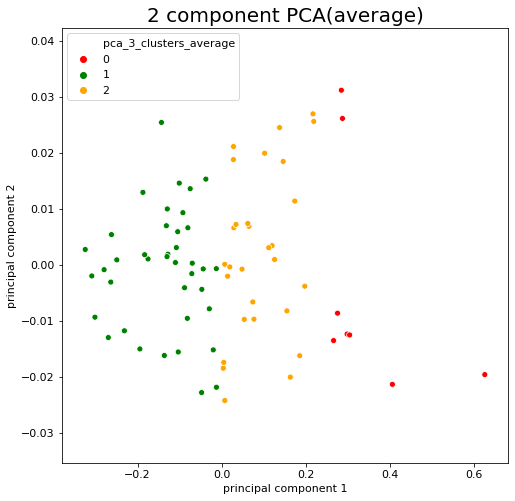

In [98]:
x_axis = principalDf1['principal component 1']
y_axis = principalDf1['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf1["pca_3_clusters_average"], palette = ['red', 'green', 'orange'])
plt.title('2 component PCA(average)', fontsize = 20)
plt.savefig("./picture/hc/pca_3_clusters_average", dpi=300)
plt.show()